## **Getting the Data** 

In [0]:
import pandas as pd

#Function to load full crash data
def load_crash_data(path="Full_Crash.csv"):
    return pd.read_csv(path)

#Function to save updated crash data after extracting useful features
def save_crash_data(data_frame):
    data_frame.to_csv('Updated_Crash_Data.csv', index=False)

In [2]:
#Open Full crash data file
crash_data = load_crash_data()
crash_data.info()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (11,12,129,130,132,133,134,135,141,145,146,147,148,149,150,151,152,154) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86000 entries, 0 to 85999
Columns: 212 entries, X to Young_Notyoung
dtypes: float64(49), int64(32), object(131)
memory usage: 139.1+ MB


In [13]:
crash_data.head()

,X,Y,OBJECTID,ACCESS_CONTROL,Alcohol_Notalcohol,A_Crash,A_People,Basetypedesc,BEGIN_NODE_DSC,Belted_Unbelted,BIKEAGE,BIKEGEN,BIKEINJURYTYPE,BIKEVEHICLENUMBER,Bike_Nonbike,BMP,B_Crash,B_People,Carspeedlimit,Collision_Type,Comm_Cargo_Body_Type_Cd,Comm_Vehicle_Body_Type_Cd,COUNT_APP,CRASH_DT__copy_,Crash_Dt,Crash_Event_Type_Dsc,Crash_Military_Tm,Crash_Severity,Crash_Year,CURBGUTTERDESC,C_Crash,C_People,Area_Type_Used,First_Harmful_Event_of_Entire_C,Physical_Juris,VDOT_District,Time_Slicing_Used,Ownership_Used,LATITUDE,Plan_District,...,Rte_Nm,RURALURBANDESC,School_Zone,SECOND_CRASH_EVENT_CD,Segtotaadt2013,Segtotaadt2014,Segtotaadt2015,Segtotaadt2016,Segtotaadt2017,Segtotaadt2018,Senior_Notsenior,Sidewalkdesc,SINGLE_MULTI,Speed_Before,Speed_Max_Safe,Speed_Notspeed,Speed_Posted,START_NODE,START_OFFSET,Summons_Issued_Cd,SURFACEDESC,THIRD_CRASH_EVENT_CD,TIME_SLICING,Total_Crashes_including_PDO,Total_Crash_1,TRAFFIC_CONTROL_TYPE,TRFC_CTRL_STATUS_TYPE,TRUCKCOMMR,Tbl_crash_Juris_Cd,Vehiclenumber,Vehicle_Body_Type_Cd,Vehicle_Make_Nm,Vehicle_Maneuver_Type_Cd,Vehicle_Model_Nm,Vehicle_Year_Nbr,Weather_Condition,Work_Zone_Location,Work_Zone_Related,Work_Zone_Type,Young_Notyoung
0,-79.163463,37.407877,2001,No Access Control,Not_ALCOHOL,0,0,Bituminous Concrete (Black Base),C1US-00501(B)/,BELTED,NaN,NaN,NaN,NaN,Not_BIKE,3.45,0,0,NaN,2. Angle,"Not Provided,Not Provided","Not Provided,Not Provided",4.0,2014-01-07T00:00:00.000Z,2014-01-07T00:00:00.000Z,20. Motor Vehicle In Transport,1943,PDO.Property Damage Only,2014,Left and Right sides,0,0,Urban,20. Motor Vehicle In Transport,118.Lynchburg,3.Lynchburg,6PM TO 9PM,PRI_URBAN,37.40787,Region 2000,...,R-VA SR00163NB,"Urbanized (Population 50,000 - 199,999)",3. No,"0,0",13845.0,13867.0,14062.0,14637.0,13248.0,13327.0,Not_SENIOR,Left and Right sides,MULTI_VEHICLE,NaN,"30,30",Not_SPEED,"30,30",179331.0,0.0,"1. Yes,2. No",0,"0,0",6PM TO 9PM,1,1,3. Traffic Signal,1. Yes - Working,Not a Parkway - Trucks and Commercial Vehicles...,118,"1,2","1. Passenger car,1. Passenger car","Chevrolet,Hyundai","3. Making Left Turn,1. Going Straight Ahead","HHR,Sonata","2008,2007",1. No Adverse Condition (Clear/Cloudy),3. Activity Area,1. Yes,1. Lane Closure,Not_YOUNG
1,-78.855123,38.423788,2002,No Access Control,Not_ALCOHOL,0,0,"Stabilized with Selected Material (Soil,Gravel...",STREET(L)/,BELTED,NaN,NaN,NaN,NaN,Not_BIKE,0.60,0,0,NaN,2. Angle,"Not Provided,Not Provided","Not Provided,Not Provided",3.0,2016-08-15T00:00:00.000Z,2016-08-15T00:00:00.000Z,20. Motor Vehicle In Transport,607,PDO.Property Damage Only,2016,Left and Right sides,0,0,Urban,20. Motor Vehicle In Transport,115.Harrisonburg,8.Staunton,6AM TO 9AM,SEC_URBAN,38.42378,Central Shenandoah,...,R-VA115UR04107NB,"Urbanized (Population 50,000 - 199,999)",3. No,"0,0",14012.0,14127.0,15057.0,14650.0,15286.0,15641.0,Not_SENIOR,None,MULTI_VEHICLE,"15,25","25,25",Not_SPEED,"25,25",587163.0,0.0,"1. Yes,2. No",0,"0,0",6AM TO 9AM,1,1,4. Stop Sign,1. Yes - Working,Not a Parkway - Trucks and Commercial Vehicles...,115,"1,2","22. Truck - Sport Utility Vehicle (SUV),22. Tr...","SUBARU,MAZDA","3. Making Left Turn,1. Going Straight Ahead","CROSSTREK,CX-5","2015,2015",1. No Adverse Condition (Clear/Cloudy),3. Activity Area,1. Yes,3. Work on Shoulder or Median,Not_YOUNG
2,-82.121504,36.630577,2003,No Access Control,Not_ALCOHOL,0,0,Bituminous Concrete (Black Base),IS-00081-N007A(L)/102-03318- 002A(R)/TO & FRO,BELTED,NaN,NaN,NaN,NaN,Not_BIKE,1.94,0,0,NaN,1. Rear End,"Not Provided,Not Provided","Not Provided,Not Provided",4.0,2015-01-26T00:00:00.000Z,2015-01-26T00:00:00.000Z,20. Motor Vehicle In Transport,1102,PDO.Property Damage Only,2015,Left and Right sides,0,0,Urban,20. Motor Vehicle In Transport,102.Bristol,1.Bristol,9AM TO 12PM,SEC_URBAN,36.63057,Mount Rogers,...,R-VA102UR03318NB,"Urbanized (Population 50,000 - 199,999)",3. No,"0,0",17019.0,16855.0,16994.0,17514.0,16410.0,16570.0,Not_SENIOR,None,MULTI_VEHICLE,"5,0",NaN,Not_SPEED,"25,25",652365.0,0.0,"2. No,2. No",0,"0,0",9AM T

In [0]:
#Create new table containing only useful features
new_crash_data = crash_data[['Carspeedlimit','Alcohol_Notalcohol', 'DAY_OF_WEEK', 'NIGHT', 'Weather_Condition', 'Young_Notyoung', 'Light_Condition', 'INTERSECTION_TYPE', 'Collision_Type', 'Time_Slicing_Used', 'RURALURBANDESC']].copy()

In [63]:
new_crash_data.head(5)

,Carspeedlimit,Alcohol_Notalcohol,DAY_OF_WEEK,NIGHT,Weather_Condition,Young_Notyoung,Light_Condition,INTERSECTION_TYPE,Collision_Type,Time_Slicing_Used,RURALURBANDESC
0,NaN,Not_ALCOHOL,Tuesday,NIGHT,1. No Adverse Condition (Clear/Cloudy),Not_YOUNG,4. Darkness - Road Lighted,4. Four Approaches,2. Angle,6PM TO 9PM,"Urbanized (Population 50,000 - 199,999)"
1,NaN,Not_ALCOHOL,Monday,DAY,1. No Adverse Condition (Clear/Cloudy),Not_YOUNG,1. Dawn,4. Four Approaches,2. Angle,6AM TO 9AM,"Urbanized (Population 50,000 - 199,999)"
2,NaN,Not_ALCOHOL,Monday,DAY,5. Rain,Not_YOUNG,2. Daylight,4. Four Approaches,1. Rear End,9AM TO 12PM,"Urbanized (Population 50,000 - 199,999)"
3,35.0,Not_ALCOHOL,Thursday,DAY,1. No Adverse Condition (Clear/Cloudy),Not_YOUNG,2. Daylight,1. Not at Intersection,1. Rear End,6PM TO 9PM,"Small Urban (Population 5,000 - 49,999)"
4,30.0,Not_ALCOHOL,Friday,DAY,6. Snow,Not_YOUNG,2. Daylight,3. Three Approaches,2. Angle,9AM TO 12PM,"Urbanized (Population 200,000 and over)"


In [64]:
#check for incomplete rows
incomplete_rows = new_crash_data[new_crash_data.isnull().any(axis=1)].head()
incomplete_rows


,Carspeedlimit,Alcohol_Notalcohol,DAY_OF_WEEK,NIGHT,Weather_Condition,Young_Notyoung,Light_Condition,INTERSECTION_TYPE,Collision_Type,Time_Slicing_Used,RURALURBANDESC
0,NaN,Not_ALCOHOL,Tuesday,NIGHT,1. No Adverse Condition (Clear/Cloudy),Not_YOUNG,4. Darkness - Road Lighted,4. Four Approaches,2. Angle,6PM TO 9PM,"Urbanized (Population 50,000 - 199,999)"
1,NaN,Not_ALCOHOL,Monday,DAY,1. No Adverse Condition (Clear/Cloudy),Not_YOUNG,1. Dawn,4. Four Approaches,2. Angle,6AM TO 9AM,"Urbanized (Population 50,000 - 199,999)"
2,NaN,Not_ALCOHOL,Monday,DAY,5. Rain,Not_YOUNG,2. Daylight,4. Four Approaches,1. Rear End,9AM TO 12PM,"Urbanized (Population 50,000 - 199,999)"
11,NaN,Not_ALCOHOL,Friday,DAY,1. No Adverse Condition (Clear/Cloudy),Not_YOUNG,3. Dusk,4. Four Approaches,2. Angle,3PM TO 6PM,"Urbanized (Population 200,000 and over)"
12,NaN,Not_ALCOHOL,Friday,DAY,5. Rain,Not_YOUNG,2. Daylight,4. Four Approaches,1. Rear End,6PM TO 9PM,"Urbanized (Population 200,000 and over)"


In [0]:
#Only 5 rows have Null values so just drop them from dataset
crash_cleaned = new_crash_data.dropna(subset=["Carspeedlimit"]) 

In [41]:
incomplete_rows = crash_cleaned[new_crash_data.isnull().any(axis=1)].head()
incomplete_rows

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Carspeedlimit,Alcohol_Notalcohol,DAY_OF_WEEK,NIGHT,Weather_Condition,Young_Notyoung,Light_Condition,INTERSECTION_TYPE,Collision_Type,Time_Slicing_Used,Area_Type_Used


In [0]:
#Save new dataframe into csv_file so Full_Crash doesn't need to be opened
save_crash_data(crash_cleaned)

## **Data Visualization**

In [65]:
lng_lat = crash_data[['X', 'Y', 'Carspeedlimit']].copy()
lng_lat.head

<bound method NDFrame.head of                X          Y  Carspeedlimit
0     -79.163463  37.407877            NaN
1     -78.855123  38.423788            NaN
2     -82.121504  36.630577            NaN
3            NaN        NaN           35.0
4     -77.147322  38.893828           30.0
...          ...        ...            ...
85995 -77.428682  37.392907           45.0
85996 -77.481652  37.574937           35.0
85997 -77.389802  37.473987            NaN
85998 -77.614292  37.521087           45.0
85999 -77.457542  37.621328           45.0

[86000 rows x 3 columns]>

In [0]:
#Drop Null values from dataset
lng_lat_prepared = lng_lat.dropna()

In [67]:
lng_lat_prepared.info

<bound method DataFrame.info of                X          Y  Carspeedlimit
4     -77.147322  38.893828           30.0
5     -77.566942  37.411767           45.0
6     -77.458312  37.627918           45.0
7     -77.526632  39.030848           45.0
8     -77.210182  38.834688           35.0
...          ...        ...            ...
85994 -77.591352  37.602628           40.0
85995 -77.428682  37.392907           45.0
85996 -77.481652  37.574937           35.0
85998 -77.614292  37.521087           45.0
85999 -77.457542  37.621328           45.0

[48406 rows x 3 columns]>

The first map of the datapoints show the Longitude and Latitude of the points. Noticably, there is a high concentration of points around major cities and roadways.

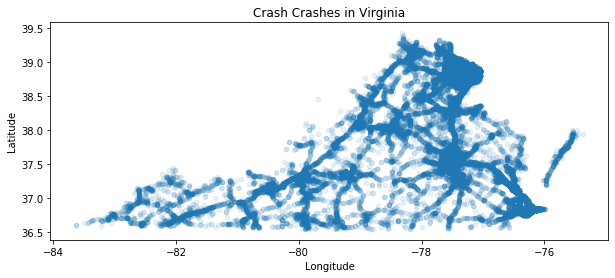

In [80]:
lng_lat_prepared.plot(kind='scatter', x='X', y='Y', alpha = 0.1,
            figsize=(10,4))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crash Crashes in Virginia')

plt.show()

The next map uses a heatmap to show the density of crashes by the speedlimit the driver was going. It can now be seen that the higher density crashes occur at lower speed limits. 

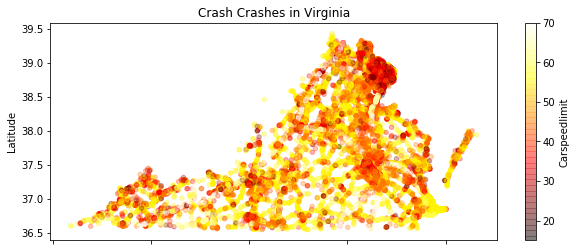

In [77]:
import matplotlib.pyplot as plt

#Heat map of 
lng_lat_prepared.plot(kind='scatter', x='X', y='Y', alpha = 0.3,
            figsize=(10,4), c='Carspeedlimit', cmap=plt.get_cmap("hot"), colorbar=True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Crash Crashes in Virginia by SpeedLimit')

plt.show()

Text(0.5, 1.0, 'Crash Crashes in Virginia Overlay Virginia Highway Map')

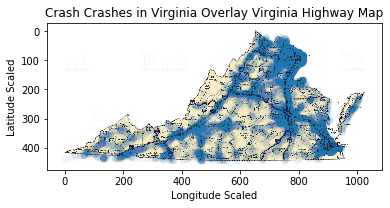

In [82]:
import numpy as np
from PIL import Image

#Overlay Scatterplot over highway map of virginia
im = plt.imread('va_highways.jpg')
implot = plt.imshow(im)

pic = Image.open('va_highways.jpg')

#Convert from original range to picture size range
OldRange_X = np.max(lng_lat_prepared['X']) - np.min(lng_lat_prepared['X']) 
OldRange_Y = np.max(lng_lat_prepared['Y']) - np.min(lng_lat_prepared['Y']) 
NewRange_X = pic.size[0]
NewRange_Y = -pic.size[1]
NewValue_X = (((lng_lat_prepared['X'] - np.min(lng_lat_prepared['X'])) * NewRange_X) / OldRange_X)
NewValue_Y = (((lng_lat_prepared['Y'] - np.min(lng_lat_prepared['Y'])) * NewRange_Y) / OldRange_Y) - NewRange_Y

plt.scatter(NewValue_X, NewValue_Y, alpha=0.01)
plt.xlabel('Longitude Scaled')
plt.ylabel('Latitude Scaled')
plt.title('Crash Crashes in Virginia Overlay Virginia Highway Map')

The above graph gives insight into where a majority of the crashes are occuring. Most crashes occur on the major highways, which is where a large percentage of drivers drive everyday. Also, a lot of crashes are concentrated around cities because the population density is higher so there are more cars. This means that features pretaining to road type and population density are important factors. This is way the RURALURBANDESC and the Carspeedlimit features were selected.

## **Data Cleaning**

In [2]:
import pandas as pd
#Function to load full crash data
def load_updated_crash_data(path="Updated_Crash_Data.csv"):
    return pd.read_csv(path)

#Open updated crash data
crash_data = load_updated_crash_data()
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50123 entries, 0 to 50122
Data columns (total 11 columns):
Carspeedlimit         50123 non-null float64
Alcohol_Notalcohol    50123 non-null object
DAY_OF_WEEK           50123 non-null object
NIGHT                 50123 non-null object
Weather_Condition     50123 non-null object
Young_Notyoung        50123 non-null object
Light_Condition       50123 non-null object
INTERSECTION_TYPE     50123 non-null object
Collision_Type        50123 non-null object
Time_Slicing_Used     50123 non-null object
Area_Type_Used        50123 non-null object
dtypes: float64(1), object(10)
memory usage: 4.2+ MB


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#Split data into categorical and numerical features for processing
crash_num = crash_data['Carspeedlimit']
crash_cat = crash_data.drop('Carspeedlimit', axis=1)

num_attribs = ["Carspeedlimit"]
cat_attribs = list(crash_cat)

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

crash_prepared = full_pipeline.fit_transform(crash_data)

In [0]:
#Split data into train and test set
from sklearn.model_selection import train_test_split

small_crash_set = crash_prepared[:8600] # for hyperparamter tuning
train_set, test_set = train_test_split(crash_prepared, test_size=0.1, random_state=42)
train_small, test_small = train_test_split(small_crash_set, test_size=0.1, random_state=42)

## **One Class SVM**

In [0]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np

#Standard GridSearch can't be performed with OneClassSVM so use custom function
#Function returns best set of parameters from input grid
def gridTune(model, train, test, grid):
  best_params = None
  best_accuracy = 0
  i = 0
  for z in ParameterGrid(grid):
    model.set_params(**z)
    model.fit(train)
    y_pred = model.predict(test)
    if 1. in y_pred:
      accScore = accuracy_score([1] * len(y_pred), y_pred)
      if (accScore >= best_accuracy):
        best_params = z
        best_accuracy = accScore
  return best_params

**RBF Kernel**

In [105]:
clf_rbf_grid = OneClassSVM(kernel='rbf')

#Parameter Grid: gamma, nu
grid = {'gamma' : np.logspace(-4,3,5),
        'nu' : np.linspace(0.3,0.99,5)}

bestParameters = gridTune(clf_rbf_grid, train_small, test_small, grid)
print(bestParameters)

{'gamma': 0.005623413251903491, 'nu': 0.3}


In [126]:
#Train svm with best parameters
clf_rbf = OneClassSVM(kernel="rbf", gamma=bestParameters['gamma'], nu=bestParameters['nu']) 
clf_rbf.fit(train_set)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.005623413251903491,
            kernel='rbf', max_iter=-1, nu=0.3, random_state=None,
            shrinking=True, tol=0.001, verbose=False)

In [127]:
#RBF Accuracy
y_pred_train_rbf = clf_rbf.predict(train_set)
y_pred_test_rbf = clf_rbf.predict(test_set)
rbf_train_acc = y_pred_train_rbf[y_pred_train_rbf == 1].size
rbf_test_acc = y_pred_test_rbf[y_pred_test_rbf == 1].size

print("Training Accuracy: ", rbf_train_acc / len(y_pred_train_rbf)) #Training accuracy
print("Testing Accuracy: ", rbf_test_acc / len(y_pred_test_rbf)) #Testing accuracy

Training Accuracy:  0.7009310574152072
Testing Accuracy:  0.6973867943347297


In [128]:
#RBF confusion matrix
confusion_matrix([1] * len(y_pred_test_rbf), y_pred_test_rbf)

array([[   0,    0],
       [1517, 3496]])

The confusion matrix for this classification looks slightly different than the confusion matrices we are used to seeing. This is because all the samples in the dataset represent car crashes. Thus the only possibilites are to calulate true positives (bottom right) or false negatives (bottom left).

**Polynomial Kernel**

In [129]:
clf_poly_grid = OneClassSVM(kernel='poly')

#Parameter Grid: gamme, nu, coef0
grid = {'gamma' : np.logspace(-4,3,5),
        'nu' : np.linspace(0.3,0.99,5),
        'coef0' : (0,1)}

bestParametersPoly = gridTune(clf_rbf_grid, train_small, test_small, grid)
print(bestParametersPoly)

{'coef0': 1, 'gamma': 0.005623413251903491, 'nu': 0.3}


In [130]:
#Train svm with best parameters
clf_poly = OneClassSVM(kernel="poly", gamma=bestParametersPoly['gamma'], 
                       nu=bestParametersPoly['nu'], coef0=bestParametersPoly['coef0']) 
clf_poly.fit(train_set)

OneClassSVM(cache_size=200, coef0=1, degree=3, gamma=0.005623413251903491,
            kernel='poly', max_iter=-1, nu=0.3, random_state=None,
            shrinking=True, tol=0.001, verbose=False)

In [131]:
#Polynomial Accuracy
y_pred_train_poly = clf_poly.predict(train_set)
y_pred_test_poly = clf_poly.predict(test_set)
poly_train_acc = y_pred_train_poly[y_pred_train_poly == 1].size
poly_test_acc = y_pred_test_poly[y_pred_test_poly == 1].size

print("Training Accuracy: ", poly_train_acc / len(y_pred_train_poly)) #Training accuracy
print("Testing Accuracy: ", poly_test_acc / len(y_pred_test_poly)) #Testing accuracy

Training Accuracy:  0.6999556639326092
Testing Accuracy:  0.6955914621982845


In [132]:
#Polynomial confusion matrix
confusion_matrix([1] * len(y_pred_test_poly), y_pred_test_poly)

array([[   0,    0],
       [1526, 3487]])

**Linear Kernel**

In [113]:
clf_lin_grid = OneClassSVM(kernel='linear')

#Parameter Grid: gamme, nu
grid = {'gamma' : np.logspace(-4,3,5),
        'nu' : np.linspace(0.3,0.99,5)}

bestParametersLin = gridTune(clf_lin_grid, train_small, test_small, grid)
print(bestParametersLin)

{'gamma': 1000.0, 'nu': 0.3}


In [133]:
#Train svm with best parameters
clf_lin = OneClassSVM(kernel="linear", gamma=bestParametersPoly['gamma'], 
                       nu=bestParametersPoly['nu']) 
clf_lin.fit(train_set)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.005623413251903491,
            kernel='linear', max_iter=-1, nu=0.3, random_state=None,
            shrinking=True, tol=0.001, verbose=False)

In [134]:
#Linear Accuracy
y_pred_train_lin = clf_lin.predict(train_set)
y_pred_test_lin = clf_lin.predict(test_set)
lin_train_acc = y_pred_train_lin[y_pred_train_lin == 1].size
lin_test_acc = y_pred_test_lin[y_pred_test_lin == 1].size

print("Training Accuracy: ", lin_train_acc / len(y_pred_train_lin)) #Training accuracy
print("Testing Accuracy: ", lin_test_acc / len(y_pred_test_lin)) #Testing accuracy

Training Accuracy:  0.6997118155619596
Testing Accuracy:  0.6973867943347297


In [135]:
#Linear confusion matrix
confusion_matrix([1] * len(y_pred_test_lin), y_pred_test_lin)

array([[   0,    0],
       [1517, 3496]])

After training with the optimal parameters on the entire datset, the rbf and linear kernels achieved the same accuracy of 69.74% on the testing set. It should be noted that the rbf kernel performed slightly better than the linear kernel on the training set.

## **K-Nearest Neighbors**

With K_Nearest Neighbors you can use novelty detection to determine whether a datapoint is an outlier or not. This is useful with our dataset since we are trying to create a boundary around the data in order to create a threshold for positive samples to be within.

In [136]:
from sklearn.neighbors import LocalOutlierFactor
clf_LOF = LocalOutlierFactor(novelty=True, n_neighbors=20, contamination='auto')  #Need to set novelty to True
clf_LOF.fit(train_set)

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=True, p=2)

In [137]:
#kNeighbors Accuracy
y_pred_LOF = clf_LOF.predict(test_set)
LOF_test_acc = y_pred_LOF[y_pred_LOF == 1].size
print("Testing Accuracy: ", LOF_test_acc / len(y_pred_LOF)) #Testing accuracy

Testing Accuracy:  0.7811689607021743


In [138]:
#kNeighbors confusion matrix
confusion_matrix([1] * len(y_pred_LOF), y_pred_LOF)

array([[   0,    0],
       [1097, 3916]])

## **Isolation Forest**

In [139]:
from sklearn.ensemble import IsolationForest
clf_iso = IsolationForest(n_estimators=10, warm_start=True, behaviour='new', verbose=1, n_jobs=100)
clf_iso.fit(train_set)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.1s finished


IsolationForest(behaviour='new', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples='auto', n_estimators=10,
                n_jobs=100, random_state=None, verbose=1, warm_start=True)

In [140]:
#isoForest Accuracy
y_pred_iso = clf_iso.predict(test_set)
iso_test_acc = y_pred_iso[y_pred_iso == 1].size
print("Testing Accuracy: ", iso_test_acc / len(y_pred_iso)) #Testing accuracy

Testing Accuracy:  0.8968681428286456


In [141]:
#isoForest confusion matrix
confusion_matrix([1] * len(y_pred_iso), y_pred_iso)

array([[   0,    0],
       [ 517, 4496]])